In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
print(tf.__version__)
print(tf.keras.__version__)

RANDOM_SEED = 42

2.17.0
3.5.0


# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 31

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 31)                  │             341 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,411 (5.51 KB)

 Trainable params: 1,411 (5.51 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Correct file path
model_save_path = "model/keypoint_classifier/keypoint_classifier.keras"

# Callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_save_path,
    verbose=1,
    save_weights_only=False
)

# Early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)


In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.0156 - loss: 3.5548
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0224 - loss: 3.4736 - val_accuracy: 0.2279 - val_loss: 3.2665
Epoch 2/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.2031 - loss: 3.2915
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2028 - loss: 3.2075 - val_accuracy: 0.3216 - val_loss: 2.9469
Epoch 3/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3047 - loss: 2.9260
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3065 - loss: 2.8195 - val_accuracy: 0.3567 - val_loss: 2.3783
Epoch 4/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.3047 - loss: 2.4830
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8878 - loss: 0.3761 


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[1.8081637e-04 9.9326307e-01 2.5113538e-04 8.4906715e-06 1.7887317e-11
 6.1309170e-03 2.3945271e-08 1.5431007e-04 5.4066146e-07 5.6497056e-06
 5.0408539e-06 4.8693596e-14 6.2067934e-17 1.3811920e-18 6.2742338e-17
 2.9058518e-15 7.1369514e-16 2.4767130e-16 5.2044583e-18 8.9293988e-17
 1.2937542e-17 2.0642938e-16 1.3811611e-17 9.5299529e-16 1.8432218e-15
 3.4842370e-15 5.5927828e-16 9.8606654e-18 1.1491855e-15 6.6938922e-15
 5.5480319e-16]
1


# 混同行列

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step


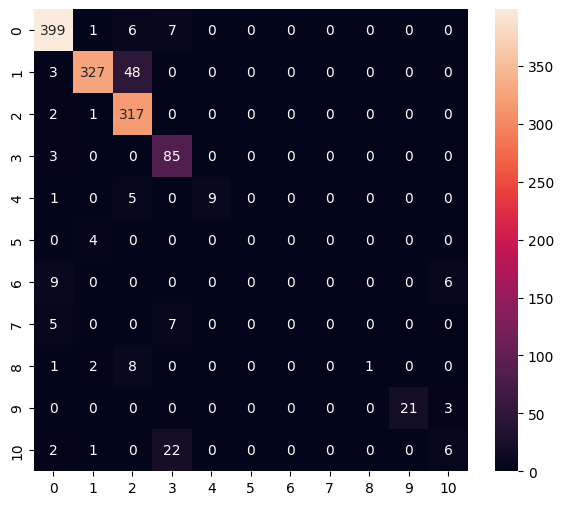

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       413
           1       0.97      0.87      0.92       378
           2       0.83      0.99      0.90       320
           3       0.70      0.97      0.81        88
           4       1.00      0.60      0.75        15
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00        15
           7       0.00      0.00      0.00        12
           8       1.00      0.08      0.15        12
           9       1.00      0.88      0.93        24
          10       0.40      0.19      0.26        31

    accuracy                           0.89      1312
   macro avg       0.62      0.50      0.52      1312
weighted avg       0.87      0.89      0.87      1312



C:\Users\mruna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mruna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mruna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\mruna\AppData\Local\Temp\tmpwouomn48\assets


INFO:tensorflow:Assets written to: C:\Users\mruna\AppData\Local\Temp\tmpwouomn48\assets


Saved artifact at 'C:\Users\mruna\AppData\Local\Temp\tmpwouomn48'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 31), dtype=tf.float32, name=None)
Captures:
  2024825037520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2024825034064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2024847218384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2024847216080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2024847216272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2024847214544: TensorSpec(shape=(), dtype=tf.resource, name=None)


7724

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 1.51 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.80816016e-04 9.93263066e-01 2.51134887e-04 8.49067146e-06
 1.78872472e-11 6.13090210e-03 2.39452227e-08 1.54309761e-04
 5.40659926e-07 5.64969469e-06 5.04084392e-06 4.86934068e-14
 6.20676892e-17 1.38118669e-18 6.27420928e-17 2.90582953e-15
 7.13692385e-16 2.47670316e-16 5.20443761e-18 8.92936376e-17
 1.29375415e-17 2.06428560e-16 1.38115563e-17 9.52991475e-16
 1.84321463e-15 3.48423657e-15 5.59276109e-16 9.86062652e-18
 1.14918093e-15 6.69386633e-15 5.54801022e-16]
1
